# Telecom X - Análisis de Evasión de Clientes
Importaciones necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##📌 Extracción

In [2]:
# Importando el JSON y convirtiendolo a un DataFrame
df = pd.read_json('https://raw.githubusercontent.com/ggsgranados/TelecomX-LATAM/refs/heads/main/TelecomX_Data.json')

In [3]:
# Mostrando el DataFrame
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##🔧 Transformación

### Conociendo el conjunto de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

### Comprobando incoherencias y normalizando

In [6]:
# Normalizando el DataFrame

# Normalizando columnas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Seleccionando columnas restantes del DataFrame original
churn_df = df[['customerID', 'Churn']]

# Uniendo las normalizaciones en un solo DataFrame
df_normalizado = pd.concat([churn_df, df_customer, df_phone, df_internet, df_account], axis=1)

In [7]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
# Contabilizando las ocurrencias de cada columna, orden descendente

for col in df_normalizado.columns:
  print(f"Occurrences for column '{col}':")
  print(df_normalizado[col].value_counts().sort_values(ascending=False))
  print("-" * 30)

Occurrences for column 'customerID':
customerID
0011-IGKFF    1
9995-HOTOH    1
0002-ORFBO    1
9971-ZWPBF    1
9972-EWRJS    1
             ..
9965-YOKZB    1
9966-VYRTZ    1
9967-ATRFS    1
9968-FFVVH    1
9970-QBCDA    1
Name: count, Length: 7267, dtype: int64
------------------------------
Occurrences for column 'Churn':
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
------------------------------
Occurrences for column 'gender':
gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------
Occurrences for column 'SeniorCitizen':
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
------------------------------
Occurrences for column 'Partner':
Partner
No     3749
Yes    3518
Name: count, dtype: int64
------------------------------
Occurrences for column 'Dependents':
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
------------------------------
Occurrences for column 'tenure':
tenure
1     634
72    369
2   

In [10]:
# --- 1. Eliminar 'customerID' ---
df_normalizado = df_normalizado.drop('customerID', axis=1)
print("\nColumna 'customerID' eliminada.")


Columna 'customerID' eliminada.


In [11]:
# --- 2. Manejar y Codificar 'Churn' ---
# Identificar las filas donde 'Churn' es un espacio vacío
churn_empty_indices = df_normalizado[df_normalizado['Churn'] == ' '].index

# La estrategia más segura es eliminar estas filas, ya que son clientes nuevos
# sin historial de churn o cargos totales.
if not churn_empty_indices.empty:
    print(f"\nSe encontraron {len(churn_empty_indices)} filas con 'Churn' vacío. Eliminando estas filas...")
    df_normalizado = df_normalizado.drop(churn_empty_indices)
    df_normalizado = df_normalizado.reset_index(drop=True) # Resetear índice después de eliminar filas

# Ahora que los vacíos están manejados, codificamos 'Churn'
df_normalizado['Churn'] = df_normalizado['Churn'].map({'No': 0, 'Yes': 1})

In [12]:
# --- 3. Manejar y convertir a numéricas 'tenure' y 'Charges.Total' ---

# Manejar 'Charges.Total':
# Primero, identifica los valores que son espacios en blanco y reemplázalos con NaN
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].replace(' ', np.nan)

# Ahora, convierte la columna a tipo numérico. Esto convertirá 'NaN' a NaN flotante.
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'])

# Imputar los NaN en 'Charges.Total' con 0.
# Esto asume que si un cliente no tiene cargos totales, es porque es un cliente nuevo.
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].fillna(0)

In [13]:
# --- 4. Aplicar One-Hot Encoding ---
columns_to_encode = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Se excluyen:
# 'SeniorCitizen' ya que ya es numérica binaria (0/1)
# 'tenure', 'Charges.Monthly', 'Charges.Total' ya que son numéricas continuas
# 'Churn' ya que es la variable objetivo codificada

# Aplicar One-Hot Encoding
df_normalizado = pd.get_dummies(df_normalizado, columns=columns_to_encode, dtype=int)

print("\nOne-Hot Encoding aplicado a las columnas categóricas.")


One-Hot Encoding aplicado a las columnas categóricas.


In [15]:
print("\nEstado final del DataFrame:")
print(df_normalizado.info())


Estado final del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   float64
 1   SeniorCitizen                            7267 non-null   int64  
 2   tenure                                   7267 non-null   int64  
 3   Charges.Monthly                          7267 non-null   float64
 4   Charges.Total                            7267 non-null   float64
 5   gender_Female                            7267 non-null   int64  
 6   gender_Male                              7267 non-null   int64  
 7   Partner_No                               7267 non-null   int64  
 8   Partner_Yes                              7267 non-null   int64  
 9   Dependents_No                            7267 non-null   int64  
 10  Dependents_Yes     

### Creando la columna 'Cuentas_Diarias'

In [16]:
# Calcular el valor diario
# Usaremos 30.44 días como el promedio de días en un mes (365.25 / 12)
df_normalizado['Cuentas_Diarias'] = df_normalizado['Charges.Monthly'] / 30.44

print("\nColumna 'Cuentas_Diarias' creada y calculada.")
print("\nEstado final del DataFrame:")
print(df_normalizado.info())


Columna 'Cuentas_Diarias' creada y calculada.

Estado final del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Churn                                    7043 non-null   float64
 1   SeniorCitizen                            7267 non-null   int64  
 2   tenure                                   7267 non-null   int64  
 3   Charges.Monthly                          7267 non-null   float64
 4   Charges.Total                            7267 non-null   float64
 5   gender_Female                            7267 non-null   int64  
 6   gender_Male                              7267 non-null   int64  
 7   Partner_No                               7267 non-null   int64  
 8   Partner_Yes                              7267 non-null   int64  
 9   Dependents_No                            7

In [17]:
df_normalizado.head()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
0,0.0,0,9,65.6,593.30,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,2.155059
1,0.0,0,9,59.9,542.40,0,1,1,0,1,...,1,0,0,1,0,0,0,0,1,1.967806
2,1.0,0,4,73.9,280.85,0,1,1,0,1,...,1,0,0,0,1,0,0,1,0,2.427727
3,1.0,1,13,98.0,1237.85,0,1,0,1,1,...,1,0,0,0,1,0,0,1,0,3.219448
4,1.0,1,3,83.9,267.40,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,2.756242


##📊 Carga y análisis

### Análisis Descriptivo

In [18]:
# Análisis general
df_normalizado.describe()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,...,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.265370,0.162653,32.346498,64.720098,2277.182035,0.494289,0.505711,0.515894,0.484106,0.699876,...,0.551122,0.209027,0.239851,0.406770,0.593230,0.218660,0.215770,0.336452,0.229118,2.126153
std,0.441561,0.369074,24.571773,30.129572,2268.648587,0.500002,0.500002,0.499782,0.499782,0.458343,...,0.497414,0.406642,0.427022,0.491265,0.491265,0.413366,0.411384,0.472528,0.420294,0.989802
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.599540
25%,0.000000,0.000000,9.000000,35.425000,396.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.163765
50%,0.000000,0.000000,29.000000,70.300000,1389.200000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.309461
75%,1.000000,0.000000,55.000000,89.875000,3778.525000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.952530
max,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.901117


In [20]:
# Metricas para la variable objetivo
## Frecuencia Absoluta y Relativa (Tasa de Churn General)
print(df_normalizado['Churn'].value_counts())
print(df_normalizado['Churn'].value_counts(normalize=True) * 100)

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [44]:
# Metricas para variables numéricas
## Medidas de Tendencia Central
print('Media: Promedio de los valores')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].mean())
print("-" * 30)
print('Mediana: Valor central cuando los datos están ordenados (menos sensible a valores atípicos)')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].median())
print("-" * 30)
print('Moda: Valor(es) que más se repiten')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].mode()) # Puede devolver múltiples modas


## Medidas de Dispersión
print('Desviación Estándar: Cuánto se dispersan los datos alrededor de la media.')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].std())
print("-" * 30)
print('Varianza: Cuadrado de la desviación estándar (mide la dispersión promedio).')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].var())
print("-" * 30)
print('Rango: Diferencia entre el valor máximo y el mínimo.')
print('Minimo -----')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].min())
print(" " * 30)
print('Maximo -----')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].max())
print("-" * 30)
print('Cuartiles: Separación de los datos en cuatro partes iguales.')
print(df_normalizado[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].quantile([0.25, 0.5, 0.75])) # Q1, Mediana, Q3
print("-" * 30)


## Relación con Churn
print('Media: Promedio de los valores')
print(df_normalizado.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].mean())
print("-" * 30)
print('Mediana: Valor central cuando los datos están ordenados (menos sensible a valores atípicos)')
print(df_normalizado.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].median())
print("-" * 30)

Media: Promedio de los valores
tenure               32.346498
Charges.Monthly      64.720098
Charges.Total      2277.182035
Cuentas_Diarias       2.126153
dtype: float64
------------------------------
Mediana: Valor central cuando los datos están ordenados (menos sensible a valores atípicos)
tenure               29.000000
Charges.Monthly      70.300000
Charges.Total      1389.200000
Cuentas_Diarias       2.309461
dtype: float64
------------------------------
Moda: Valor(es) que más se repiten
   tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
0     1.0            20.05            0.0         0.658673
1     NaN              NaN           20.2              NaN
Desviación Estándar: Cuánto se dispersan los datos alrededor de la media.
tenure               24.571773
Charges.Monthly      30.129572
Charges.Total      2268.648587
Cuentas_Diarias       0.989802
dtype: float64
------------------------------
Varianza: Cuadrado de la desviación estándar (mide la dispersión promedio).
tenur

In [47]:
# Resumen relacional
print('Resumen de la relación con Churn')
print(df_normalizado.groupby('Churn').describe())

Resumen de la relación con Churn
      SeniorCitizen                                               tenure  \
              count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                      
0.0          5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0  5174.0   
1.0          1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0  1869.0   

                  ... PaymentMethod_Mailed check      Cuentas_Diarias  \
            mean  ...                        75%  max           count   
Churn             ...                                                   
0.0    37.569965  ...                        1.0  1.0          5174.0   
1.0    17.979133  ...                        0.0  1.0          1869.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
Churn                                                           

In [48]:
# Matriz de correlación
df_normalizado.corr()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Cuentas_Diarias
Churn,1.000000,0.150889,-0.352229,0.193356,-0.198324,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683,0.193356
SeniorCitizen,0.150889,1.000000,0.018187,0.220388,0.104076,0.004288,-0.004288,-0.022970,0.022970,0.212952,...,0.136871,-0.046832,-0.114837,-0.157734,0.157734,-0.015747,-0.022698,0.170705,-0.154216,0.220388
tenure,-0.352229,0.018187,1.000000,0.247982,0.825407,-0.005765,0.005765,-0.377551,0.377551,-0.159892,...,-0.647138,0.205970,0.557675,-0.007949,0.007949,0.240732,0.235319,-0.207056,-0.234305,0.247982
Charges.Monthly,0.193356,0.220388,0.247982,1.000000,0.652211,0.013889,-0.013889,-0.097122,0.097122,0.115832,...,0.059747,0.008758,-0.077935,-0.353714,0.353714,0.038536,0.031610,0.275550,-0.378635,1.000000
Charges.Total,-0.198324,0.104076,0.825407,0.652211,1.000000,-0.000367,0.000367,-0.315409,0.315409,-0.061474,...,-0.444708,0.175271,0.351109,-0.160023,0.160023,0.180759,0.185229,-0.056029,-0.296090,0.652211
gender_Female,0.008612,0.004288,-0.005765,0.013889,-0.000367,1.000000,-1.000000,-0.005007,0.005007,0.012038,...,0.001312,-0.007328,0.005449,-0.011273,0.011273,0.018361,-0.000700,-0.002060,-0.015057,0.013889
gender_Male,-0.008612,-0.004288,0.005765,-0.013889,0.000367,-1.000000,1.000000,0.005007,-0.005007,-0.012038,...,-0.001312,0.007328,-0.005449,0.011273,-0.011273,-0.018361,0.000700,0.002060,0.015057,-0.013889
Partner_No,0.150448,-0.022970,-0.377551,-0.097122,-0.315409,-0.005007,0.005007,1.000000,-1.000000,0.448900,...,0.277828,-0.081021,-0.246472,-0.011201,0.011201,-0.109090,-0.081613,0.079629,0.097648,-0.097122
Partner_Yes,-0.150448,0.022970,0.377551,0.097122,0.315409,0.005007,-0.005007,-1.000000,1.000000,-0.448900,...,-0.277828,0.081021,0.246472,0.011201,-0.011201,0.109090,0.081613,-0.079629,-0.097648,0.097122
Dependents_No,0.164221,0.212952,-0.159892,0.115832,-0.061474,0.012038,-0.012038,0.448900,-0.448900,1.000000,...,0.230598,-0.068755,-0.203136,-0.111752,0.111752,-0.050923,-0.061608,0.151749,-0.060222,0.115832


### Distribución de evasión

Conteo de clientes por estado de Churn:
Churn_Label
Permaneció        5174
Se dio de baja    1869
Name: count, dtype: int64

Proporción de clientes por estado de Churn (%):
Churn_Label
Permaneció        73.463013
Se dio de baja    26.536987
Name: proportion, dtype: float64


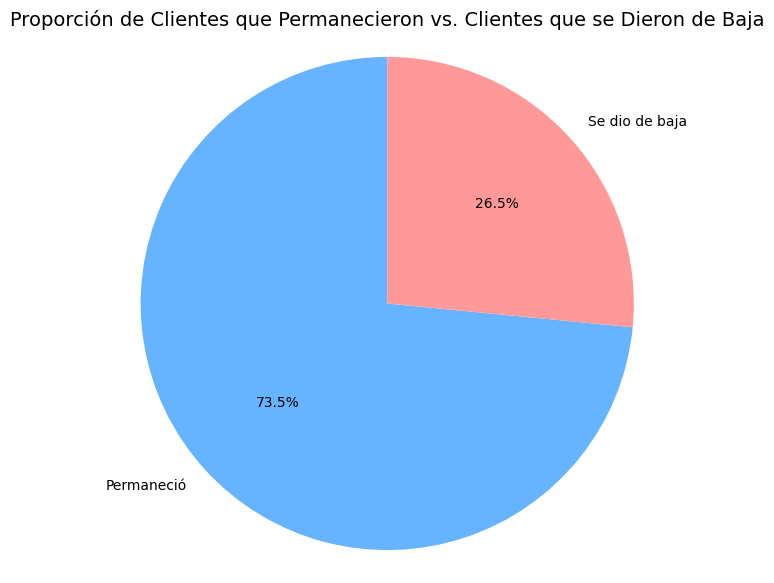

<ipython-input-59-016fbe3a87d9>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


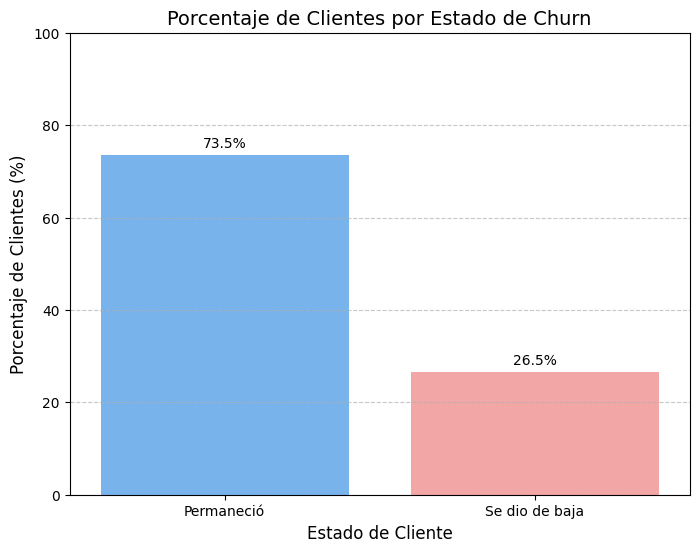

<ipython-input-59-016fbe3a87d9>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df_normalizado, palette='coolwarm')


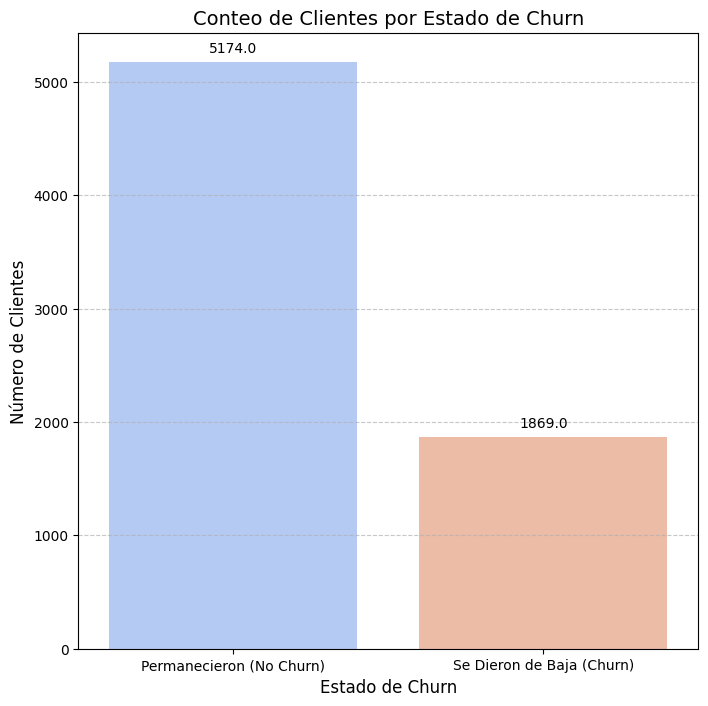

In [59]:

# --- Preparar los datos para la visualización ---
# Renombrar los valores 0 y 1 para que sean más descriptivos en el gráfico
df_normalizado['Churn_Label'] = df_normalizado['Churn'].map({0: 'Permaneció', 1: 'Se dio de baja'})

# Calcular las frecuencias y proporciones
churn_counts = df_normalizado['Churn_Label'].value_counts()
churn_proportions = df_normalizado['Churn_Label'].value_counts(normalize=True) * 100

print("Conteo de clientes por estado de Churn:")
print(churn_counts)
print("\nProporción de clientes por estado de Churn (%):")
print(churn_proportions)

# --- 1. Gráfico de Pastel (Pie Chart) ---
plt.figure(figsize=(7, 7)) # Tamaño del gráfico
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%', # Formato para mostrar el porcentaje
    startangle=90,     # Ángulo de inicio para la primera porción
    colors=['#66b3ff','#ff9999'] # Colores para "Permaneció" y "Se dio de baja"
)
plt.title('Proporción de Clientes que Permanecieron vs. Clientes que se Dieron de Baja', fontsize=14)
plt.axis('equal') # Asegura que el pastel sea un círculo
plt.show()

# --- 2. Gráfico de Barras (Bar Chart) ---
plt.figure(figsize=(8, 6)) # Tamaño del gráfico
sns.barplot(
    x=churn_proportions.index, # Etiquetas del eje X (Permaneció, Se dio de baja)
    y=churn_proportions.values, # Valores del eje Y (porcentajes)
    palette=['#66b3ff','#ff9999'] # Colores
)
plt.title('Porcentaje de Clientes por Estado de Churn', fontsize=14)
plt.xlabel('Estado de Cliente', fontsize=12)
plt.ylabel('Porcentaje de Clientes (%)', fontsize=12)
plt.ylim(0, 100) # Asegura que el eje Y vaya de 0 a 100 para proporciones

# Añade etiquetas de porcentaje en la parte superior de cada barra
for index, value in enumerate(churn_proportions.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula para mejor lectura
plt.show()

# Grafico de barras con el conteo
plt.figure(figsize=(8, 8)) # Aumentamos ligeramente el tamaño para que las etiquetas quepan mejor
ax = sns.countplot(x='Churn', data=df_normalizado, palette='coolwarm')
plt.title('Conteo de Clientes por Estado de Churn', fontsize=14)
plt.xticks([0, 1], ['Permanecieron (No Churn)', 'Se Dieron de Baja (Churn)'], fontsize=10)
plt.xlabel('Estado de Churn', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# --- Añadir etiquetas de conteo a las barras ---
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', # Texto de la etiqueta (el conteo)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posición (centro de la barra, arriba)
                ha='center', # Alineación horizontal
                va='center', # Alineación vertical
                xytext=(0, 10), # Desplazamiento de texto (0px x, 10px y)
                textcoords='offset points', # Coordenadas relativas
                fontsize=10,
                color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula ligera
plt.show()

##📄Informe final